# WP3

## John D'Angelo

## University of Texas at Austin

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#retrieve file
fileName = 'LostHills.xlsx'
# remember to skip those units, strings and 
# doubles do not mix well
data = pd.read_excel(fileName,skiprows=[1])

In [2]:
#Check that everything is there
data.head()

,DEPTH,Res. Pressure,Density,dt-comp,dt-shear,Porosity
0,1750,700.0,1.87,177.3271,477.1760,0.374409
1,1755,702.0,1.86,176.3417,479.4971,0.380977
2,1760,704.0,1.85,180.1919,481.2379,0.387546
3,1765,706.0,1.86,179.5510,482.3984,0.380977
4,1770,708.0,1.87,177.1933,472.7273,0.374409


Part a, compute and plot total vertical stress as a fuction of depth. Assume homogeneous rock above 1750 ft, and overpressure parameter.

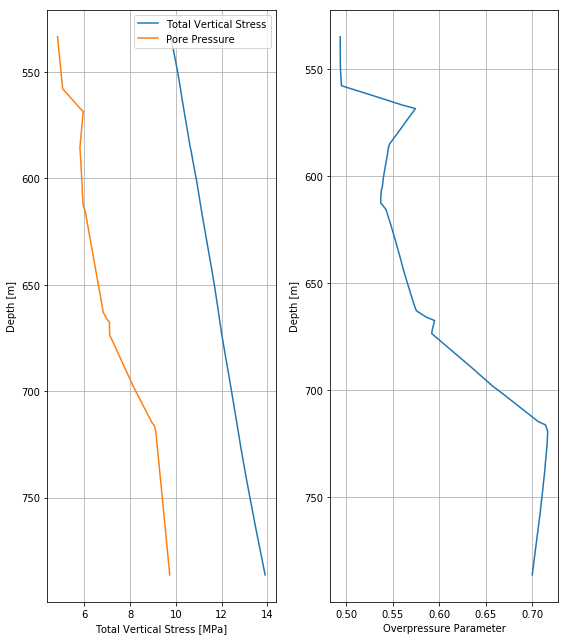

In [11]:
data = pd.read_excel(fileName,skiprows=[1])

# I will work in SI units from this point forward
# Let us make the units of my data more consistent 
# to avoid confusion later on.
data['DEPTH'] *= 0.3048 #ft -> m
data['Density'] *= 1000 #g/cc -> kg/m3
data['Res. Pressure'] *= 0.006895 #psi -> MPa
data['dt-comp'] *= (1e-6)/0.3048 #us/ft -> s/m
data['dt-shear'] *= (1e-6)/0.3048 #us/ft -> s/m


#Calculate vertical stress
gravity = 9.81 #m/s2

# We are told that the formation above the first data point is uniform.
# So we can determine the contribution of the upper 1750 ft of formation to the Sv
dZ = np.diff(np.linspace(0,data['DEPTH'].iloc[0]))
offsetSv = np.sum(dZ*gravity*data['Density'].iloc[0])


deltaZ = data['DEPTH'].diff(1) #m
density = data['Density'] #kg/m3
Sv = offsetSv + np.cumsum(gravity*density*deltaZ)#Total vertical stress in Pa
Sv = Sv*(1e-6) #Pa - > MPa

#Pore Pressure
Pp = data['Res. Pressure']

#Determine overpressure parameter
lambdaP = Pp/Sv 

fig = plt.figure(figsize=(8,9))
ax = fig.add_subplot(121)
ax.plot(Sv,data['DEPTH'],label = 'Total Vertical Stress')
ax.plot(Pp,data['DEPTH'],label = 'Pore Pressure')
ax.grid()
ax.invert_yaxis()
ax.set_xlabel("Total Vertical Stress [MPa]")
ax.set_ylabel("Depth [m]")
ax.legend()
ax1 = fig.add_subplot(122)
ax1.plot(lambdaP,data['DEPTH'])
ax1.grid()
ax1.invert_yaxis()
ax1.set_xlabel("Overpressure Parameter")
ax1.set_ylabel("Depth [m]")
plt.tight_layout()

Part b, Compute dynamic Poisson’s ratio and dynamic Young’s modulus from
compressive and shear slowness (be careful with unit conversion)

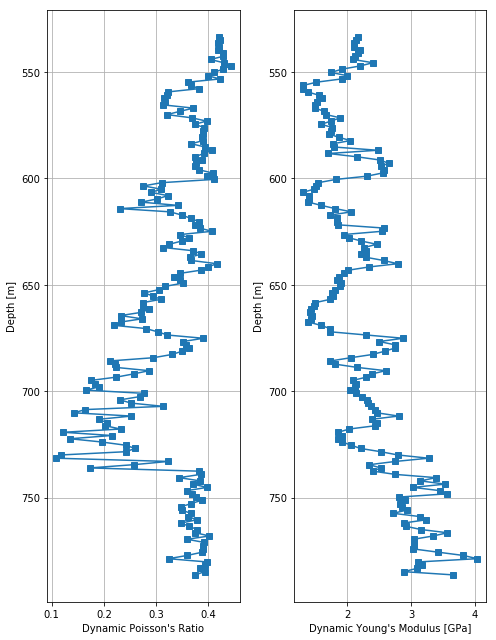

In [12]:
Vp = 1/data['dt-comp'] #P-wave velocity
Vs = 1/data['dt-shear'] #S-wave velocity

M = (Vp**2)*data['Density']
G = (Vs**2)*data['Density']

nom = 3*(Vp**2) - 4*(Vs**2)
den = (Vp**2) - (Vs**2)
E_Dyn = data['Density']*(Vs**2)*(nom/den)*1e-9 #DYNAMIC Young's Modulus [GPa]
v_Dyn = (Vp**2 - 2*(Vs**2))/(2*(Vp**2 - Vs**2)) #DYNAMIC Poissan's ratio [-] 


fig = plt.figure(figsize=(7,9))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(v_Dyn,data['DEPTH'],'s-')

ax1.grid()
ax1.invert_yaxis()
ax1.set_xlabel("Dynamic Poisson's Ratio")
ax1.set_ylabel("Depth [m]")

ax2.plot(E_Dyn,data['DEPTH'],'s-')

ax2.grid()
ax2.invert_yaxis()
ax2.set_xlabel("Dynamic Young's Modulus [GPa]")
ax2.set_ylabel("Depth [m]")
plt.tight_layout()

Part c, compute static Young's modulus

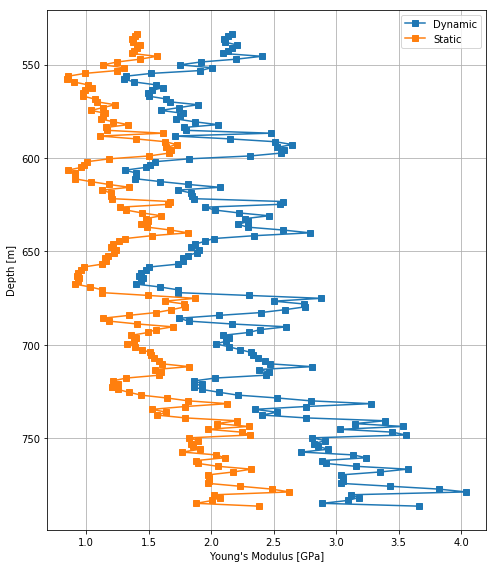

In [13]:
E_static = E_Dyn*0.65

fig = plt.figure(figsize=(7,8))
ax = fig.add_subplot(111)

ax.plot(E_Dyn,data['DEPTH'],'s-',label='Dynamic')
ax.plot(E_static,data['DEPTH'],'s-',label='Static')

ax.grid()
ax.invert_yaxis()
ax.set_xlabel("Young's Modulus [GPa]")
ax.set_ylabel("Depth [m]")
plt.tight_layout()
ax.legend()

Part d, Compute and plot static plane strain modulus

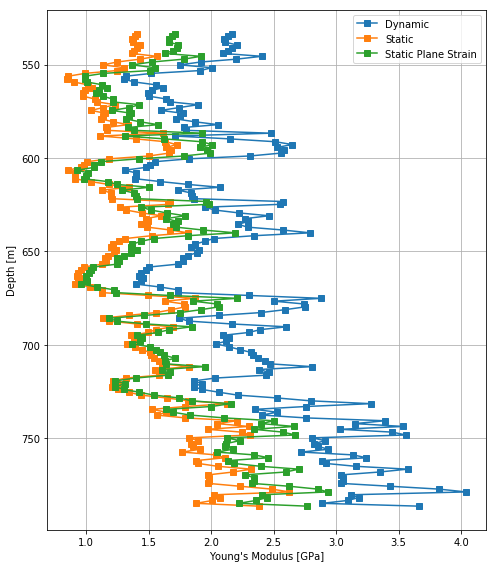

In [14]:
fig = plt.figure(figsize=(7,8))
ax = fig.add_subplot(111)
E_static_Plane = E_static/(1-v_Dyn**2)
ax.plot(E_Dyn,data['DEPTH'],'s-',label='Dynamic')
ax.plot(E_static,data['DEPTH'],'s-',label='Static')
ax.plot(E_static_Plane,data['DEPTH'],'s-',label='Static Plane Strain')

ax.grid()
ax.invert_yaxis()
ax.set_xlabel("Young's Modulus [GPa]")
ax.set_ylabel("Depth [m]")
plt.tight_layout()
ax.legend()

Part e, Compute horizontal stress assuming theory of elasticity and no tectonic strains.

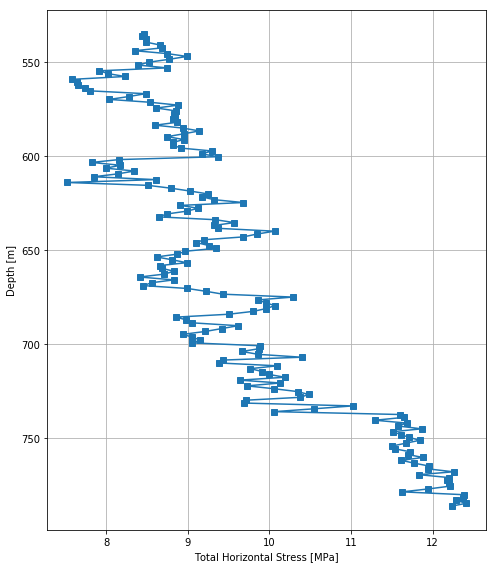

In [30]:
#Effective vertiacl stress
sigV = Sv-Pp
#Effective horizontal stress
sigH = (v_Dyn/(1-v_Dyn))*sigV
fig = plt.figure(figsize=(7,8))
ax = fig.add_subplot(111)
ax.plot(sigH+Pp,data['DEPTH'],'s-')

ax.grid()
ax.invert_yaxis()
ax.set_xlabel("Total Horizontal Stress [MPa]")
ax.set_ylabel("Depth [m]")
plt.tight_layout()


Part f, Compute and plot maximum and minimum horizontal stress assuming theory of elasticity and eHmax = 0.0015 and ehmin = 0


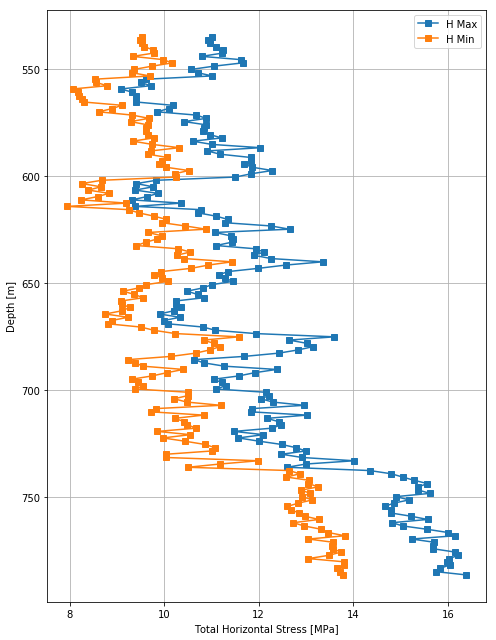

In [31]:
eHmax = 0.0015
ehmin = 0
Ep = E_static_Plane*(1e3) #needed a shorter variable name,
                            # Also GPa -> Mpa
sigHmax = sigV*(v_Dyn/(1-v_Dyn)) + Ep*eHmax + v_Dyn*Ep*ehmin
sighmin = sigV*(v_Dyn/(1-v_Dyn)) + v_Dyn*Ep*eHmax + Ep*ehmin

fig = plt.figure(figsize=(7,9))
ax = fig.add_subplot(111)
ax.plot(sigHmax+Pp,data['DEPTH'],'s-',label='H Max')
ax.plot(sighmin+Pp,data['DEPTH'],'s-',label='H Min')

ax.grid()
ax.invert_yaxis()
ax.set_xlabel("Total Horizontal Stress [MPa]")
ax.set_ylabel("Depth [m]")
plt.tight_layout()
ax.legend()

Part g, The pay-zone is between 2,100 ft and 2,450 ft. A hydraulic fracture is
planned to be executed with a vertical well at a depth between 2,130 ft and
2,160 ft. What will be the height of this fracture? Will it reach out to the
entire pay zone?

(6, 20)

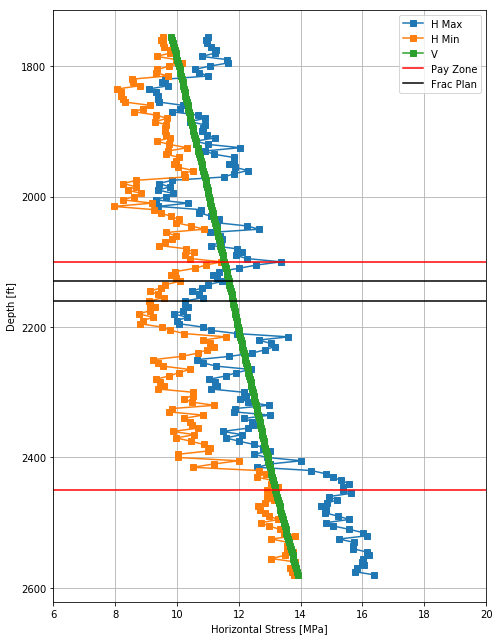

In [29]:
#Payzone
payUpperBound = 2100 #ft
payLowerBound = 2450 #ft

#Fracture Plan
fracUpperBound = 2130 #ft
fracLowerBound = 2160 #ft

#Let us draw the boundaries
eHmax = 0.0015
ehmin = 0
Ep = E_static_Plane*(1e3) #needed a shorter variable name,
                            # Also GPa -> Mpa
sigHmax = sigV*(v_Dyn/(1-v_Dyn)) + Ep*eHmax + v_Dyn*Ep*ehmin
sighmin = sigV*(v_Dyn/(1-v_Dyn)) + v_Dyn*Ep*eHmax + Ep*ehmin

SHmax = sigHmax + Pp
Shmin = sighmin + Pp

fig = plt.figure(figsize=(7,9))
ax = fig.add_subplot(111)
ax.plot(SHmax,data['DEPTH']/0.3048,'s-',label='H Max')
ax.plot(Shmin,data['DEPTH']/0.3048,'s-',label='H Min')
ax.plot(Sv,data['DEPTH']/0.3048,'s-',label='V')

ax.plot([0,1e15],[payUpperBound,payUpperBound],'r',label='Pay Zone')
ax.plot([0,1e15],[payLowerBound,payLowerBound],'r')
ax.plot([0,1e15],[fracUpperBound,fracUpperBound],'k',label='Frac Plan')
ax.plot([0,1e15],[fracLowerBound,fracLowerBound],'k')

ax.grid()
ax.invert_yaxis()
ax.set_xlabel("Horizontal Stress [MPa]")
ax.set_ylabel("Depth [ft]")
plt.tight_layout()
ax.legend()
ax.set_xlim([6,20])


## Looking at the above plot, one can see that if a fracture is initiated between 2130 ft and 2160 ft (black boundary lines), the fracture will expand up and down until it reaches the region where the horizontal stress is significantly higher that the stress in the fracture region. On the plot, this corresponds to approximately 2100 ft and 2220 ft. This means the the fractures height will be approximately 120 ft and it should stop growing up and down just short of the upper limit of the pay zone. At that point, the fracture will start growing out of the page.